### Librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Conexión SQL
# ==============================================================================
import psycopg2 as ps

import seaborn as sns

#Biblioteca para estimar modelos estadísticos y realizar pruebas estadísticas.
# ==============================================================================
import statsmodels.formula.api as sfm 

from sklearn.preprocessing import PolynomialFeatures 

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn import linear_model

### Conexión SQL

In [2]:
conexion = ps.connect(host="codbview.c21jlbp5d5qr.us-east-1.rds.amazonaws.com", database="codb", user="sgonzalez", password="AdarlaToda100%",port="5432")

In [3]:
# Creamos el cursor con el objeto conexion
cur = conexion.cursor()

# Ejecutamos una consulta
sql = """
select ipc, activations, radio, tv, ooh, btl_kioscos_y_retail, pop, 
digital_performance, rotacion, comisiones, eventos_alto_bitacora, eventos_bajo_bitacora, eventos_medio_bitacora 
from sal_indicators_in sa 
where sales_channel = 'Kioskos'
"""

consulta = cur.execute(sql)

data = cur.fetchall()

In [4]:
df = pd.DataFrame(data,columns=['ipc','activations','radio','tv','ooh','btl_kioscos_y_retail','pop','digital_performance','rotacion','comisiones','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'])

df['ipc']=df['ipc'].astype('float')
df['rotacion']=df['rotacion'].astype('float')
df['eventos_alto_bitacora']=df['eventos_alto_bitacora'].astype('float')
df['eventos_bajo_bitacora']=df['eventos_bajo_bitacora'].astype('float')
df['eventos_medio_bitacora']=df['eventos_medio_bitacora'].astype('float')


df = df.fillna(0)
#df = df.dropna()

df.head()

,ipc,activations,radio,tv,ooh,btl_kioscos_y_retail,pop,digital_performance,rotacion,comisiones,eventos_alto_bitacora,eventos_bajo_bitacora,eventos_medio_bitacora
0,1.60,6128,41687525,771166,0,35200000.0,2884220.0,365633245,0.13,5355069,0.00,0.0,1.00
1,1.56,5920,57231920,95440163,79373000,0.0,8170000.0,422084086,0.07,6038084,0.75,0.0,0.25
2,1.51,5719,116243171,194643334,0,0.0,0.0,429255030,0.14,7089592,1.00,0.0,0.00
3,1.95,4505,117469351,366792554,0,0.0,34349575.0,426026002,0.03,6431856,0.30,0.1,0.60
4,3.30,4137,131734088,320208915,0,0.0,34349575.0,372675824,0.05,9457454,1.00,0.0,0.00


### Distribución de los Datos

<Figure size 2160x1440 with 0 Axes>

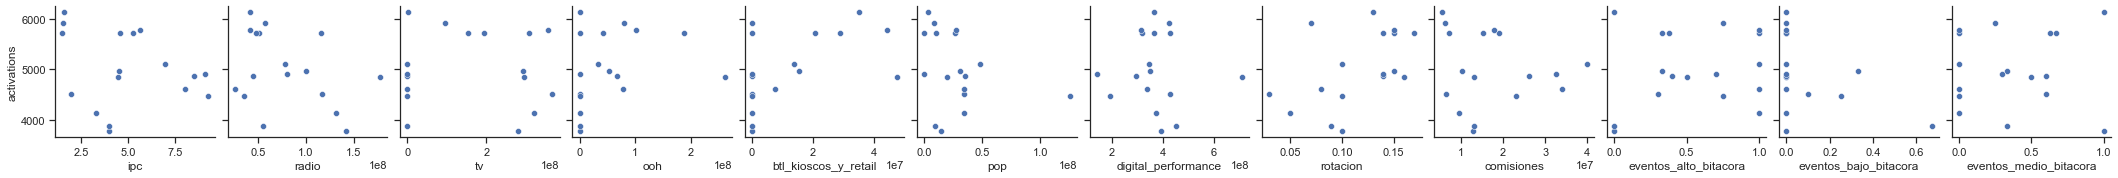

In [5]:
plt.figure(figsize=(30,20)) 
sns.set_theme(style="ticks")

sns.pairplot(df, x_vars=['ipc','radio','tv','ooh','btl_kioscos_y_retail','pop','digital_performance','rotacion','comisiones','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'], y_vars=['activations']) 

plt.show()

### Correlaciones

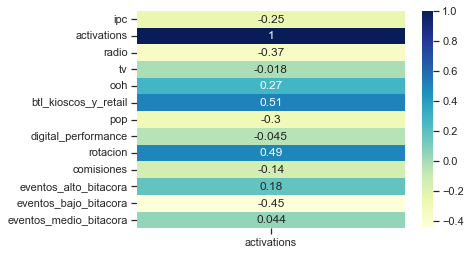

In [6]:
corrMatrix_1 = df.corr(method ='pearson')[['activations']]


sns.heatmap(corrMatrix_1, annot=True,cmap="YlGnBu")

plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df)

df = pd.DataFrame(scaled,columns=['ipc','activations','radio','tv','ooh','btl_kioscos_y_retail','pop','digital_performance','rotacion','comisiones','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'])

df = df.fillna(0)
#df = df.dropna()

df.head()

,ipc,activations,radio,tv,ooh,btl_kioscos_y_retail,pop,digital_performance,rotacion,comisiones,eventos_alto_bitacora,eventos_bajo_bitacora,eventos_medio_bitacora
0,-1.311166,1.592125,-0.870890,-1.066161,-0.736316,1.384404,-0.857172,-0.004035,0.385027,-1.145119,-1.531394,-0.452709,1.889798
1,-1.326841,1.297713,-0.508717,-0.418478,0.365472,-0.766977,-0.669777,0.480201,-1.125463,-1.078756,0.536961,-0.452709,-0.343281
2,-1.346435,1.013208,0.866201,0.260227,-0.736316,-0.766977,-0.959425,0.541714,0.636775,-0.976589,1.226413,-0.452709,-1.087641
3,-1.174010,-0.705141,0.894770,1.437996,-0.736316,-0.766977,0.258356,0.514015,-2.132456,-1.040496,-0.704052,0.117369,0.698822
4,-0.644979,-1.226024,1.227128,1.119291,-0.736316,-0.766977,0.258356,0.056376,-1.628959,-0.746523,1.226413,-0.452709,-1.087641


### Omitir Variables 
De acuerdo a su correlación

In [6]:
del df['eventos_medio_bitacora']
#del df['radio']
#del df['ipc']
del df['eventos_alto_bitacora']
#del df['ooh']
#del df['pop']
del df['tv']
#del df['rotacion']
#del df['comisiones']
del df['digital_performance']
#del df['eventos_bajo_bitacora']

### Regresión Lineal

In [7]:
# División de los datos en train y test
# ==============================================================================
X = df.drop(columns='activations',axis=1)
y = df['activations']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.7067090591486912
MAE:  0.43216016912708066
MSE:  0.22912068965422605

explained_variance: 0.9457783616602372




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            activations   R-squared (uncentered):                   0.855
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              6.655
Date:                Thu, 14 Jul 2022   Prob (F-statistic):                     0.00510
Time:                        13:05:38   Log-Likelihood:                         -7.6844
No. Observations:                  17   AIC:                                      31.37
Df Residuals:                       9   BIC:                                      38.03
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ipc                      -0.9466      0.370     -2.556      0.031      -1.785      -0.109
radio                    -0.5952      0.145     -4.109      0.003      -0.923      -0.267
ooh                       0.0055      0.174      0.031      0.976      -0.389       0.400
btl_kioscos_y_retail      0.0425      0.194      0.219      0.831      -0.397       0.482
pop                       0.1625      0.183      0.889      0.397      -0.251       0.576
rotacion                  0.5594      0.200      2.791      0.021       0.106       1.013
comisiones                0.2931      0.310      0.945      0.369      -0.408       0.994
eventos_bajo_bitacora    -0.4185      0.141     -2.972      0.016      -0.737      -0.100
==============================================================================
Omnibus:                        2.489   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.288   Jarque-Bera (JB):                0.955
Skew:                          -0.533   Prob(JB):                        0.620
Kurtosis:                       3.463   Cond. No.                         6.14
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['ipc', 'radio', 'ooh', 'btl_kioscos_y_retail', 'pop', 'rotacion',
       'comisiones', 'eventos_bajo_bitacora'],
      dtype='object')

w = [[-0.8065547  -0.70419283  0.0400325   0.09066987  0.08073385  0.44910511
   0.24142888 -0.46676275]], b = [0.10168475]


In [10]:
model.params

ipc                       -467.372959
radio                        0.000009
ooh                         -0.000004
btl_kioscos_y_retail        -0.000005
pop                          0.000023
rotacion                 37434.169312
comisiones                   0.000103
eventos_bajo_bitacora      -76.286958
dtype: float64

### Modelo Regresión Activaciones con Recarga y con PAC

In [11]:
# Creamos el cursor con el objeto conexion
cur2 = conexion.cursor()

# Ejecutamos una consulta
sql2 = """
select activations, activations_w_topups, activations_pacs
from sal_indicators_in sa 
where sales_channel = 'Kioskos'
"""

consulta2 = cur2.execute(sql2)

data2 = cur2.fetchall()

In [12]:
df2 = pd.DataFrame(data2,columns=['activations','activations_w_topups','activations_pacs'])



df2 = df2.fillna(0)
#df = df.dropna()

df2.head()

,activations,activations_w_topups,activations_pacs
0,6128,6056,5546
1,5920,5890,5696
2,5719,5680,5198
3,4505,4465,4216
4,4137,4110,4008


##### Recargas

In [13]:
# División de los datos en train y test
# ==============================================================================

X = df2[['activations']]
y = df2['activations_w_topups']


X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.9965368990635988
MAE:  30.909564122021948
MSE:  1189.0790824446701

explained_variance: 0.996617614108332




<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     activations_w_topups   R-squared (uncentered):                   1.000
Model:                              OLS   Adj. R-squared (uncentered):              1.000
Method:                   Least Squares   F-statistic:                          4.033e+05
Date:                  Tue, 05 Jul 2022   Prob (F-statistic):                    1.21e-36
Time:                          21:22:23   Log-Likelihood:                         -82.790
No. Observations:                    17   AIC:                                      167.6
Df Residuals:                        16   BIC:                                      168.4
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
activations     0.9908      0.002    635.047      0.000       0.987       0.994
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.665
Skew:                          -0.767   Prob(JB):                        0.435
Kurtosis:                       3.020   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['activations'], dtype='object')

w = [[0.98127869]], b = [48.07441022]


\begin{align}
\dot{activations W topups} = \ activations(0.98127869) + 48.07441022\\
\end{align}

##### PACS

In [15]:
# División de los datos en train y test
# ==============================================================================
X = df2[['activations_w_topups']]
y = df2['activations_pacs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.9739297076057906
MAE:  60.69706358564258
MSE:  5485.129232190495

explained_variance: 0.975579964913159




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       activations_pacs   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.306e+04
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                    7.12e-29
Time:                        21:22:23   Log-Likelihood:                         -100.83
No. Observations:                  17   AIC:                                      203.7
Df Residuals:                      16   BIC:                                      204.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
activations_w_topups     0.9443      0.005    207.501      0.000       0.935       0.954
==============================================================================
Omnibus:                        0.834   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.801
Skew:                          -0.411   Prob(JB):                        0.670
Kurtosis:                       2.326   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['activations_w_topups'], dtype='object')

w = [[0.89786524]], b = [241.14673314]


\begin{align}
\dot{activations PACs} = \ activationsWtopups(5.86820739) + 27.76834312\\
\end{align}